<a href="https://colab.research.google.com/github/rsskga/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats, ttest_rel
from IPython.display import HTML

In [0]:
# Allow for multiple dataframe outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-16 20:28:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-09-16 20:28:33 (278 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [130]:
df = pd.read_csv("house-votes-84.data", header=None,
                 names=["Handicapped Infants", "Water Project Cost Sharing", 
                        "Adoption of the Budget Resolution", 
                        "Physician Fee Freeze", "El Salvador Aid",
                        "Religious Groups in Schools", "Anti-Satellite Test Ban",
                        "Aid to Nicaraguan Contras", "MX Missile", "Immigration",
                        "Synfuels Corporation Cutback", "Education Spending",
                        "Superfund Right to Sue", "Crime", "Duty-Free Exports",
                        "Export Administration Act South Africa"])

df.replace(to_replace={'n': 0, 'y': 1, '?': np.nan}, inplace=True)

table_props = [('border-collapse', 'collapse')]

th_props = [
  ('border', '1px solid #000'),
  ("writing-mode", "vertical-rl"), 
  ('transform', 'rotateZ(-90deg)'),
  ('min-width', '80px'),
  ('max-width', '80px'),
  ('height', '120px')
  ]

td_props = [
  ('border', '1px solid #000'),
  ('min-width', '80px'),
  ('max-width', '80px'),
  ('text-align', 'center')
  ]

styles = [dict(selector="", props=table_props),
          dict(selector="th.col_heading", props=th_props),
          dict(selector="td", props=td_props)]

df.head()

,Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,MX Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty-Free Exports,Export Administration Act South Africa
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [153]:
dems = df[df.index == "democrat"]
idx = range(0, (len(dems)))
dems.index = idx
html = (dems.head().style.set_table_styles(styles).hide_index())
print("\n\nDemocrat voting records")
html



Democrat voting records


Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,MX Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty-Free Exports,Export Administration Act South Africa
nan,1,1,nan,1,1,0,0,0,0,1,0,1,1,0,0
0,1,1,0,nan,1,0,0,0,0,1,0,1,0,0,1
1,1,1,0,1,1,0,0,0,0,1,nan,1,1,1,1
0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
0,1,0,1,1,1,0,0,0,0,0,0,nan,1,1,1


In [154]:
reps = df[df.index == "republican"]
idx = range(0, (len(reps)))
reps.index = idx
html = (reps.head().style.set_table_styles(styles).hide_index())
print("\n\nRebublican voting records")
html



Rebublican voting records


Handicapped Infants,Water Project Cost Sharing,Adoption of the Budget Resolution,Physician Fee Freeze,El Salvador Aid,Religious Groups in Schools,Anti-Satellite Test Ban,Aid to Nicaraguan Contras,MX Missile,Immigration,Synfuels Corporation Cutback,Education Spending,Superfund Right to Sue,Crime,Duty-Free Exports,Export Administration Act South Africa
0,1,0,1,1,1,0,0,0,1,nan,1,1,1,0,1
0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,nan
0,1,0,1,1,1,0,0,0,0,0,0,1,1,nan,1
0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
0,1,0,1,1,0,0,0,0,0,nan,nan,1,1,0,0


In [196]:
print("Adoption of the Budget Resolution >> Dems support more than Reps with p < 0.01")

print("Democratic support for this bill")
dems["Adoption of the Budget Resolution"].mean()
print("\nRepublican support for this bill")
reps["Adoption of the Budget Resolution"].mean()

print("\n\n1. Null hypothesis = Dems support this bill unanimously")
print("\n2. Alternative hypothesis = Dems support this bill non-unanimously")
print("\n3. Confidence level >= 99%")
ttest = ttest_1samp(dems["Adoption of the Budget Resolution"], 1, nan_policy="omit")
print("\n4. t-statistic: " + str(ttest.statistic) + " & p-value: " + str(ttest.pvalue))

print("\n5. Conclusion: Due to a p-value of ~0.00, I reject the null hypothesis and conclude that Democratic support for this bill is non-unanimous.")

Adoption of the Budget Resolution >> Dems support more than Reps with p < 0.01
Democratic support for this bill


0.8884615384615384


Republican support for this bill


0.13414634146341464



1. Null hypothesis = Dems support this bill unanimously

2. Alternative hypothesis = Dems support this bill non-unanimously

3. Confidence level >= 99%

4. t-statistic: -5.702205846437985 & p-value: 3.217258173105712e-08

5. Conclusion: Due to a p-value of ~0.00, I reject the null hypothesis and conclude that Democratic support for this bill is non-unanimous.


In [176]:
print("El Salvador Aid >> Reps support more than Dems with p < 0.01")
print("Democratic support for this bill")
dems["El Salvador Aid"].mean()
print("\nRepublican support for this bill")
reps["El Salvador Aid"].mean()
print("\n\n1. Null hypothesis = Reps support this bill unanimously")
print("\n2. Alternative hypothesis = Reps support this bill non-unanimously")
print("\n3. Confidence level >= 99%")
print("\n4. t-statistic & p-value")
ttest_1samp(reps["El Salvador Aid"], 1, nan_policy="omit")
print("\n\n5. Conclusion: Due to a p-value of ~0.00, I reject the null hypothesis and conclude that Republican support for this bill is non-unanimous.")

El Salvador Aid >> Reps support more than Dems with p < 0.01
Democratic support for this bill


0.21568627450980393


Republican support for this bill


0.9515151515151515



1. Null hypothesis = Reps support this bill unanimously

2. Alternative hypothesis = Reps support this bill non-unanimously

3. Confidence level >= 99%

4. t-statistic & p-value


Ttest_1sampResult(statistic=-2.890793645020198, pvalue=0.004363402589282088)



5. Conclusion: Due to a p-value of ~0.00, I reject the null hypothesis and conclude that Republican support for this bill is non-unanimous.


In [180]:
print("Water Project Cost Sharing >> minimal difference between Dems and Reps with p > 0.1")
print("Democratic support for this bill")
dems["Water Project Cost Sharing"].mean()
print("\nRepublican support for this bill")
reps["Water Project Cost Sharing"].mean()
print("\n\n1. Null hypothesis = Dems and Reps support this bill equally")
print("\n2. Alternative hypothesis = Dems and Reps support this bill unequally")
print("\n3. Confidence level >= 99%")
print("\n4. t-statistic & p-value")
ttest_ind(dems["Water Project Cost Sharing"], 
          reps["Water Project Cost Sharing"], nan_policy="omit")
print("\n\n5. Conclusion: Due to a p-value of ~0.93, I accept the null hypothesis and conclude that Dems and Reps support this bill equally.")

Water Project Cost Sharing >> minimal difference between Dems and Reps with p > 0.1
Democratic support for this bill


0.502092050209205


Republican support for this bill


0.5067567567567568



1. Null hypothesis = Dems and Reps support this bill equally

2. Alternative hypothesis = Dems and Reps support this bill unequally

3. Confidence level >= 99%

4. t-statistic & p-value


Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)



5. Conclusion: Due to a p-value of ~0.93, I accept the null hypothesis and conclude that Dems and Reps support this bill equally.


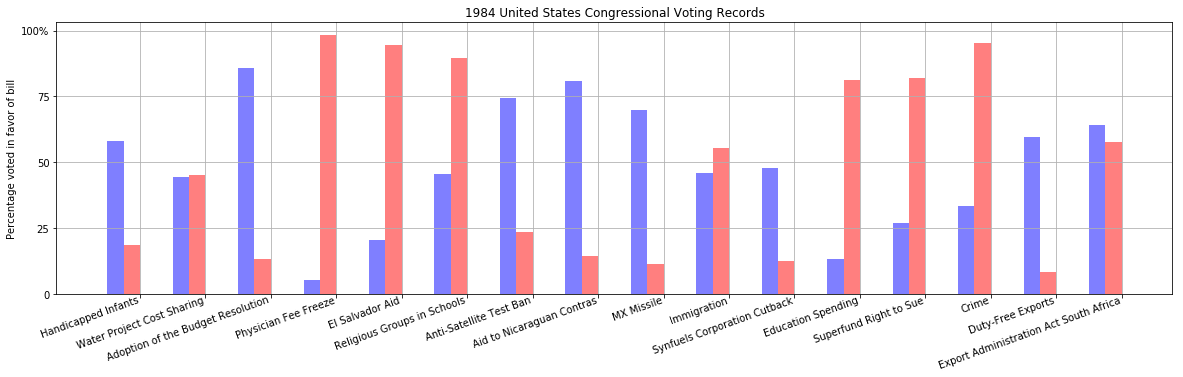

In [244]:
# Setting the positions and width for the bars
pos = list(range(len(dems.columns)));
width = 0.25;
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,5));

# Create a bar with Democratic data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        dems.sum().div(269), # 269 = the total number of Dems in office in 1984
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the first value in first_name
        label="Democrats");

# Create a bar with Republican data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        reps.sum().div(166), # 166 = the total number of Reps in office in 1984
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='red', 
        # with label the second value in first_name
        label="Republicans");

ax.set_title('1984 United States Congressional Voting Records')

# x axis
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(dems.columns, rotation=20, ha="right", va="baseline", position=(0, -0.005))

# y axis
ax.set_ylabel('Percentage voted in favor of bill')
plt.yticks(np.arange(0, 1.25, step=0.25), ("0", "25", "50", "75", "100%"))

plt.grid();
plt.show();